<a href="https://colab.research.google.com/github/WilliamBeebee/Projects/blob/main/BPDrugModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

In [ ]:
#DONT RUN THIS START ON BLOCK 3
from google.colab import files
uploaded = files.upload()
#DONT RUN THIS START ON BLOCK 3

Saving BPDrugData.xlsx to BPDrugData.xlsx


In [ ]:
import io

# Assuming the file name is 'SpaceTitanic.xls'
file_name = 'BPDrugData.xlsx'

df = pd.read_excel(io.BytesIO(uploaded[file_name]))

In [ ]:
print(df.isnull().sum())

Subject          0
Treatment        0
Age              0
Gender           0
Before_exp_BP    0
After_exp_BP     0
dtype: int64


In [ ]:
df['Age'].max()


75

In [ ]:
for index, age in enumerate(df['Age']):
  if age == 75:
    print(df.loc[index, 'Before_exp_BP'])

89.8


In [ ]:
max_age_bp = df['Age'].idxmax()
before_max = df.loc[max_age_bp, 'Before_exp_BP']
before_max


89.8

In [ ]:
df['Age'].min()

45

In [ ]:
min_age_bp = df['Age'].idxmin()
before_min = df.loc[min_age_bp, 'Before_exp_BP']
before_min

98.4

In [ ]:
df

,Treatment,Age,Gender,Before_exp_BP,After_exp_BP,TotalLost
0,1,65,1,103.3,80.5,-22.8
1,1,59,1,93.6,85.9,-7.7
2,1,60,0,92.0,85.2,-6.8
3,1,54,1,93.0,87.8,-5.2
4,1,65,1,95.4,85.3,-10.1
5,1,57,0,109.6,94.2,-15.4
6,1,69,0,97.9,83.9,-14.0
7,1,62,0,96.0,85.0,-11.0
8,1,49,1,98.4,86.3,-12.1
9,1,45,1,98.4,90.0,-8.4


In [ ]:
treatment_one = df.loc[df['Treatment'] == 0].mean()
treatment_one

Treatment         0.000000
Age              62.090909
Gender            0.500000
Before_exp_BP    97.131818
After_exp_BP     92.186364
TotalLost        -4.945455
dtype: float64

In [ ]:
from scipy.stats import ttest_ind

group1 = df.loc[df['Treatment'] == 1, 'Before_exp_BP']
group2 = df.loc[df['Treatment'] == 0, 'Before_exp_BP']

t_statistic, p_value = ttest_ind(group1,group2)

t_statistic


-0.31242635587571355

In [ ]:
df = df.drop('Subject', axis =1)

In [ ]:
df['Gender'] = df['Gender'].replace({'M': 0, 'F': 1})

In [ ]:
df['TotalLost'] = df['After_exp_BP'] - df['Before_exp_BP']

In [ ]:
contingency_table2 = pd.crosstab(df['Age'], df['TotalLost'])

chi2, p, dof, expected = chi2_contingency(contingency_table2)

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 1002.0833333333334
P-value: 0.2043903561806528
Expected frequencies:
[[0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 ...
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]
 [0.02 0.02 0.02 ... 0.02 0.02 0.02]]


In [ ]:
import pandas as pd
import numpy as np

df['bpsqage'] = np.sqrt(df['Before_exp_BP'] / df['Age'])

min_index = df.loc[:49, 'bpsqage'].idxmin()
min_index

32

In [ ]:
df

,Treatment,Age,Gender,Before_exp_BP,After_exp_BP,TotalLost,bpsqage
0,1,65,1,103.3,80.5,-22.8,1.260647
1,1,59,1,93.6,85.9,-7.7,1.259540
2,1,60,0,92.0,85.2,-6.8,1.238278
3,1,54,1,93.0,87.8,-5.2,1.312335
4,1,65,1,95.4,85.3,-10.1,1.211484
5,1,57,0,109.6,94.2,-15.4,1.386653
6,1,69,0,97.9,83.9,-14.0,1.191151
7,1,62,0,96.0,85.0,-11.0,1.244342
8,1,49,1,98.4,86.3,-12.1,1.417097
9,1,45,1,98.4,90.0,-8.4,1.478738


In [ ]:
y = df['bpsqage']
X = df['Age']

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                bpsqage   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7625
Date:                Wed, 07 Feb 2024   Prob (F-statistic):              0.387
Time:                        01:08:58   Log-Likelihood:                 55.328
No. Observations:                  51   AIC:                            -106.7
Df Residuals:                      49   BIC:                            -102.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3226      0.068     19.487      0.0

In [ ]:
correlation_coefficient = df['Age'].corr(df['bpsqage'])
print("Correlation Coefficient:", correlation_coefficient)


Correlation Coefficient: -0.12251538515043667


<function matplotlib.pyplot.show(close=None, block=None)>

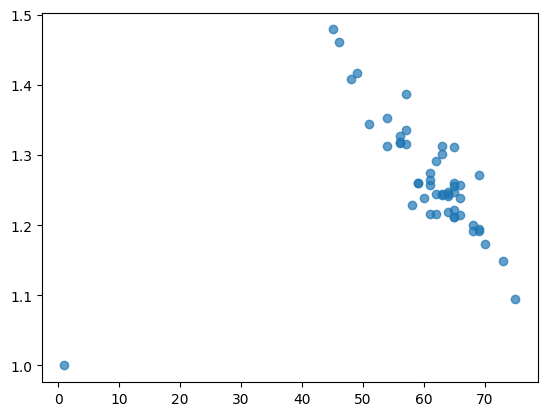

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Age'], df['bpsqage'], label='Actual Data', alpha=.7)
plt.show

In [ ]:
avg_men = df.loc[df['Gender'] == 0, 'Age'].mean()
avg_women = df.loc[df['Gender'] == 1, 'Age'].mean()

avg_men



62.25

In [ ]:
contingency_table1 = pd.crosstab(df['Treatment'], df['TotalLost'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)

# Display the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print("Expected frequencies:")
print(expected)

Chi-square statistic: 50.00000000000002
P-value: 0.3175334836789403
Expected frequencies:
[[0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.88 0.44 0.44
  0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.44
  0.44 0.44 0.44 0.88 0.44 0.44 0.44 0.88 0.44 0.44 0.44 0.44 0.44 0.44
  0.44 0.44 0.44 0.44 0.44]
 [0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 1.12 0.56 0.56
  0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.56
  0.56 0.56 0.56 1.12 0.56 0.56 0.56 1.12 0.56 0.56 0.56 0.56 0.56 0.56
  0.56 0.56 0.56 0.56 0.56]]


In [ ]:
import statsmodels.api as sm

# Assuming 'TotalLost' is the dependent variable
X = df[['Treatment', 'Age', 'Gender', 'Before_exp_BP']]
X = sm.add_constant(X)
y = df['After_exp_BP']

# Fit the linear regression model
model = sm.OLS(y, X)
result = model.fit()

# Display the summary
print(result.summary())



                            OLS Regression Results                            
Dep. Variable:           After_exp_BP   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     125.9
Date:                Wed, 07 Feb 2024   Prob (F-statistic):           3.67e-24
Time:                        00:50:18   Log-Likelihood:                -139.69
No. Observations:                  51   AIC:                             289.4
Df Residuals:                      46   BIC:                             299.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            15.2440      4.042      3.772